In [2]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst

In [38]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_tracking_with_RLS()
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_tracking_with_RLS()

# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(len(x_deka))  # time steps 0..N-1
print(t)

x_nom:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
x_nom:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
step:  0 
 prediction_err:  4.818164911366276e-06 

x_nom:  [0.0314107591 0.0627905195 0.           1.           0.
 0.           0.           0.           0.           0.
 0.           0.           0.          ]
step:  1 
 prediction_err:  8.459723072466997e-07 

x_nom:  [0.0627905195 0.1253332336 0.           1.           0.
 0.           0.           0.           0.           0.
 0.           0.           0.          ]
step:  2 
 prediction_err:  2.7283691828256794e-09 

x_nom:  [0.0941083133 0.1873813146 0.           1.           0.
 0.           0.           0.           0.           0.
 0.           0.           0.          ]
step:  3 
 prediction_err:  1.674036939223621e-09 

x_nom: 

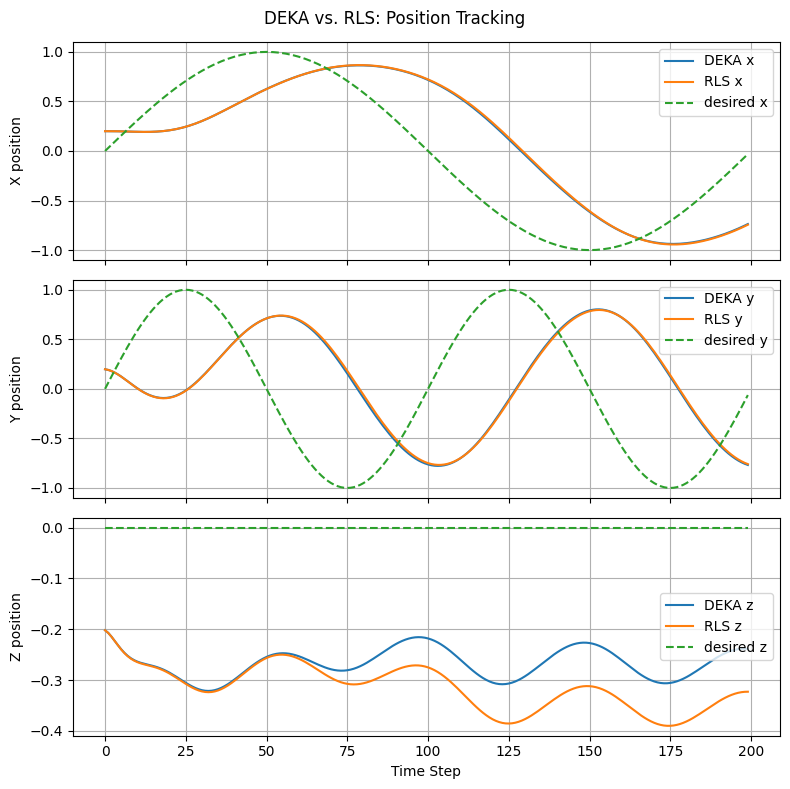

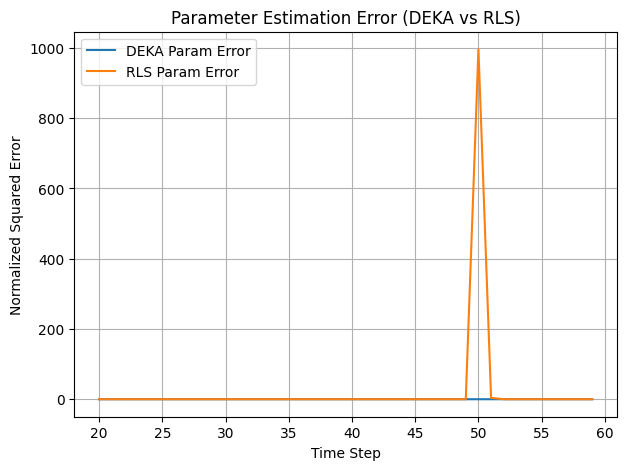

In [39]:

fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_des   = [row[2] for row in x_des][:200]

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_des, '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_des, '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_des, '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('DEKA vs. RLS: Position Tracking')
plt.tight_layout()
plt.show()

# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                   / np.sum(theta_deka_array**2, axis=1)
param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
                   / np.sum(theta_rls_array**2, axis=1)

plt.figure(figsize=(7,5))
plt.plot(t[20:60], param_error_deka[20:60], label='DEKA Param Error')
plt.plot(t[20:60], param_error_rls[20:60],  label='RLS Param Error')
plt.xlabel('Time Step')
plt.ylabel('Normalized Squared Error')
plt.title('Parameter Estimation Error (DEKA vs RLS)')
plt.grid(True)
plt.legend()
plt.show()


In [28]:
Over_all_normalized_error= np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                / np.sum(theta_deka_array**2, axis=1)

single_normalized_error= np.sum(((theta_hat_deka_array - theta_deka_array)**2) / (theta_deka_array**2),axis=1)
print(single_normalized_error-Over_all_normalized_error)

[4.3810583967e+00 3.2623495832e+00 1.6586162701e-06 9.9885728399e-08
 5.1621025508e-08 7.0974102313e-09 3.8060942283e-07 2.9852488915e-06
 8.6782942485e-06 7.9578994583e-06 1.2137709392e-06 8.2821881615e-07
 1.3365368803e-06 5.1687767717e-06 7.8018787787e-06 5.5714235852e-06
 9.5587221384e-07 4.3874679742e-06 4.2935681326e-05 1.5717669176e-04
 2.8432789772e-04 2.3604546959e-04 1.1942225918e-04 6.2812566831e-05
 4.2317451124e-05 3.5720855049e-05 3.5110856643e-05 3.3077801373e-05
 2.0449376652e-05 5.7183203097e-06 4.6780269453e-07 1.0997449407e-09
 5.3867628387e-08 1.1680424729e-06 8.0499837664e-06 2.4832366588e-05
 2.5280150111e-05 1.5333287856e-05 7.6942549071e-06 2.4517452573e-06
 4.8555788067e-07 4.7813469762e-07 2.7257863054e-06 6.6088975432e-06
 6.4918933561e-06 6.0851838991e-06 8.9561940796e-06 1.7879194463e-05
 3.6205206148e-05 6.5583296973e-05 1.3316654495e+03 6.5908803451e+00
 5.4333492924e-01 6.0319279666e-03 2.0988887407e-03 2.8989755043e-04
 2.6051079926e-04 3.8032042408e-04